# Climatic data

Input :https://www.renewables.ninja/
Country/Weather data weighted by population.



In [1]:
import pandas as pd
from project.thermal import TEMP_BASE, ORIENTATION_FACTOR
from project.utils import make_plot

In [2]:
data = pd.read_csv('ninja_weather_country_FR_merra-2_population_weighted.csv', skiprows=[0, 1], index_col=[0], parse_dates=[0])

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 350640 entries, 1980-01-01 00:00:00 to 2019-12-31 23:00:00
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   precipitation       350640 non-null  float64
 1   temperature         350640 non-null  float64
 2   irradiance_surface  350640 non-null  float64
 3   irradiance_toa      350640 non-null  float64
 4   snowfall            350640 non-null  float64
 5   snow_mass           350640 non-null  float64
 6   cloud_cover         350640 non-null  float64
 7   air_density         350640 non-null  float64
dtypes: float64(8)
memory usage: 24.1 MB


In [4]:
data.head()

,precipitation,temperature,irradiance_surface,irradiance_toa,snowfall,snow_mass,cloud_cover,air_density
time,,,,,,,,
1980-01-01 00:00:00,0.1553,-0.537,0.0,0.0,0.0108,4.6697,0.9293,1.2516
1980-01-01 01:00:00,0.2150,-0.489,0.0,0.0,0.0225,4.6878,0.9422,1.2518
1980-01-01 02:00:00,0.2593,-0.391,0.0,0.0,0.0316,4.7160,0.9427,1.2518
1980-01-01 03:00:00,0.2673,-0.354,0.0,0.0,0.0367,4.7508,0.9316,1.2515
1980-01-01 04:00:00,0.2518,-0.354,0.0,0.0,0.0585,4.7998,0.9270,1.2513


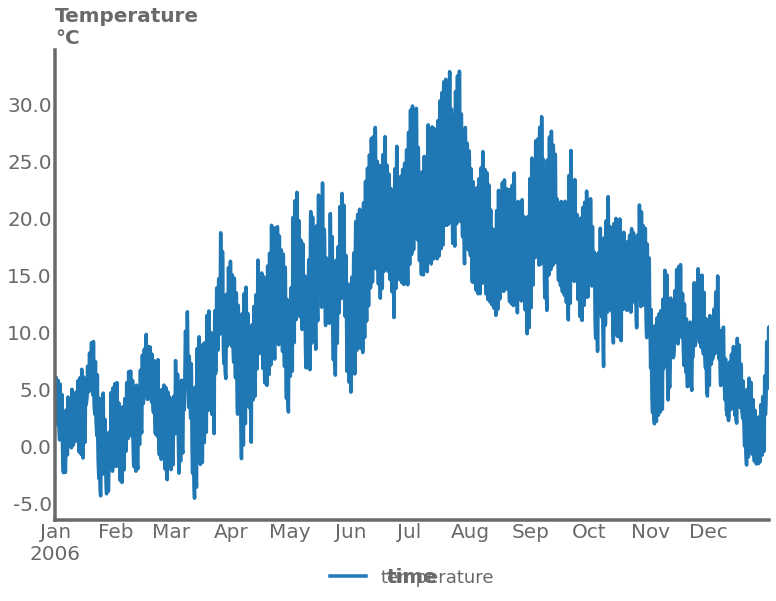

In [5]:
make_plot(data.loc[data.index.year == 2006, 'temperature'], 'Temperature (°C)', integer=False, ymin=None)

## Calculation

In [6]:
"""variables = ['temperature', 'irradiance_surface']
d_hs_yr, temp_hs_yr, irr_hs_yr = dict(), dict(), dict()
d_hs_month, temp_hs_month, irr_hs_month = dict(), dict(), dict()
d_hs_day, temp_hs_day, irr_hs_day = dict(), dict(), dict()

for year in data.index.year.unique():

    d = data.loc[data.index.year == year, variables]
    d = d.groupby([d.index.month, d.index.day]).agg({'temperature': 'mean', 'irradiance_surface': 'sum'})
    d.index.names = ['month', 'day']

    hs = d['temperature'] < TEMP_BASE

    # yearly data
    d_hs_yr.update({year: hs.sum()})
    temp_hs_yr.update({year: (hs * d['temperature']).sum() / d_hs_yr[year]})
    irr_hs_yr.update({year:  (hs * d['irradiance_surface']).sum() / 1000})

    # monthly data
    d_hs_month.update({year: hs.groupby('month').sum()})
    temp_hs_month.update({year: (hs * d['temperature']).groupby('month').sum() / d_hs_month[year]})
    irr_hs_month.update({year: (hs * d['irradiance_surface']).groupby('month').sum() / 1000})

    # daily data
    d_hs_day.update({year: hs})
    temp_hs_day.update({year: hs.replace(False, float('nan')) * d['temperature']})
    irr_hs_day.update({year: hs.replace(False, float('nan')) * d['irradiance_surface'] / 1000})

    # smooth daily data

result_year = pd.concat((pd.Series(d_hs_yr), pd.Series(temp_hs_yr), pd.Series(irr_hs_yr)), axis=1, keys=['d_hs', 'temp_hs', 'irr_hs (kWh/m2)'])
result_month = pd.concat((pd.DataFrame(d_hs_month).rename_axis('year', axis=1).stack(), pd.DataFrame(temp_hs_month).rename_axis('year', axis=1).stack(), pd.DataFrame(irr_hs_month).rename_axis('year', axis=1).stack()), axis=1, keys=['d_hs', 'temp_hs', 'irr_hs (kWh/m2)'])
result_day = pd.concat((pd.DataFrame(d_hs_day).rename_axis('year', axis=1).stack(), pd.DataFrame(temp_hs_day).rename_axis('year', axis=1).stack(), pd.DataFrame(irr_hs_day).rename_axis('year', axis=1).stack()), axis=1, keys=['d_hs', 'temp_hs', 'irr_hs (kWh/m2)'])"""

"variables = ['temperature', 'irradiance_surface']\nd_hs_yr, temp_hs_yr, irr_hs_yr = dict(), dict(), dict()\nd_hs_month, temp_hs_month, irr_hs_month = dict(), dict(), dict()\nd_hs_day, temp_hs_day, irr_hs_day = dict(), dict(), dict()\n\nfor year in data.index.year.unique():\n\n    d = data.loc[data.index.year == year, variables]\n    d = d.groupby([d.index.month, d.index.day]).agg({'temperature': 'mean', 'irradiance_surface': 'sum'})\n    d.index.names = ['month', 'day']\n\n    hs = d['temperature'] < TEMP_BASE\n\n    # yearly data\n    d_hs_yr.update({year: hs.sum()})\n    temp_hs_yr.update({year: (hs * d['temperature']).sum() / d_hs_yr[year]})\n    irr_hs_yr.update({year:  (hs * d['irradiance_surface']).sum() / 1000})\n\n    # monthly data\n    d_hs_month.update({year: hs.groupby('month').sum()})\n    temp_hs_month.update({year: (hs * d['temperature']).groupby('month').sum() / d_hs_month[year]})\n    irr_hs_month.update({year: (hs * d['irradiance_surface']).groupby('month').sum() / 1

In [7]:
df = data.groupby(pd.Grouper(freq='D')).agg({'temperature': 'mean', 'irradiance_surface': 'sum'})

df['smooth_temperature'] = df['temperature'].rolling(7).mean()
df['smooth_irradiance'] = df['irradiance_surface'].rolling(7).mean()

df['heating_season'] = df['temperature'] < TEMP_BASE
df['temperature_season'] = df['temperature'] * df['heating_season']
df['irradiance_season'] = df['irradiance_surface'] * df['heating_season']
variables_output = ['heating_season', 'temperature_season', 'irradiance_season']

df['smooth_heating_season'] = df['smooth_temperature'] < TEMP_BASE
df['smooth_temperature_season'] = df['smooth_temperature'] * df['smooth_heating_season']
df['smooth_irradiance_season'] = df['smooth_irradiance'] * df['smooth_heating_season']
variables_smooth_output = ['smooth_heating_season', 'smooth_temperature_season', 'smooth_irradiance_season']

result_day = df[variables_output].copy()
result_day['irradiance_season'] =  result_day['irradiance_season'] / 1000

result_smooth_day = df[variables_smooth_output].copy()
result_smooth_day['smooth_irradiance_season'] =  result_smooth_day['smooth_irradiance_season'] / 1000

result_month = df[variables_output].groupby(pd.Grouper(freq='M')).sum()
result_month['temperature_season'] =  result_month['temperature_season'] / result_month['heating_season']
result_month['irradiance_season'] =  result_month['irradiance_season'] / 1000

result_year = df[variables_output].groupby(pd.Grouper(freq='Y')).sum()
result_year['temperature_season'] =  result_year['temperature_season'] / result_year['heating_season']
result_year['irradiance_season'] =  result_year['irradiance_season'] / 1000


In [8]:
result_year.tail()

,heating_season,temperature_season,irradiance_season
time,,,
2015-12-31,190,6.708960,469.998801
2016-12-31,209,6.487117,540.501853
2017-12-31,198,6.371504,515.854081
2018-12-31,186,6.267253,403.208264
2019-12-31,194,6.690634,519.875811


In [9]:
var = 'irradiance_season'
for key, factor in ORIENTATION_FACTOR.items():
    result_year['{} {}'.format(var, key)] = result_year[var] * factor
    result_month['{} {}'.format(var, key)] = result_month[var] * factor
    result_day['{} {}'.format(var, key)] = result_day[var] * factor
    result_smooth_day['{} {}'.format(var, key)] = result_day[var] * factor


In [10]:
# exporting data yearly
export_resirf = result_year[variables_output]
export_resirf.columns = ['DAYS_HEATING_SEASON', 'TEMP_EXT', 'SOLAR_RADIATION']
export_resirf.to_csv('output/climatic_data.csv')

In [11]:
export_resirf_daily = result_day[variables_output]
export_resirf_daily.columns = ['DAYS_HEATING_SEASON', 'TEMP_EXT', 'SOLAR_RADIATION']
export_resirf_daily.to_csv('output/climatic_data_daily.csv')

In [12]:
export_resirf_smooth_daily = result_smooth_day[variables_smooth_output]
export_resirf_smooth_daily.columns = ['DAYS_HEATING_SEASON', 'TEMP_EXT', 'SOLAR_RADIATION']
export_resirf_smooth_daily.to_csv('output/climatic_data_smooth_daily.csv')

In [14]:
# exporting data monthly
export_resirf = result_month[variables_output]
export_resirf.columns = ['DAYS_HEATING_SEASON', 'TEMP_EXT', 'SOLAR_RADIATION']
export_resirf.to_csv('output/climatic_data_month.csv')

### Climatic data

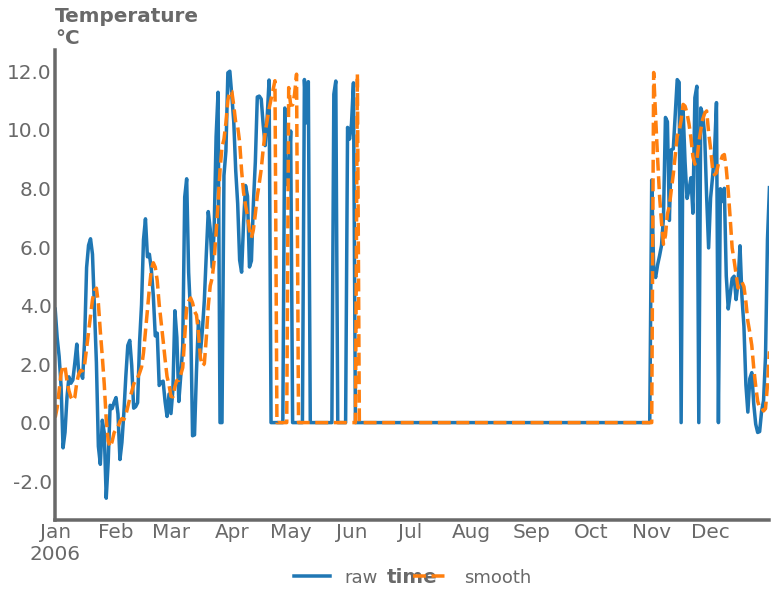

In [13]:
temp_2006 = {'raw': result_day.loc[result_day.index.year == 2006, 'temperature_season'],
 'smooth': result_smooth_day.loc[result_day.index.year == 2006, 'smooth_temperature_season']
 }
make_plot(pd.DataFrame(temp_2006), 'Temperature (°C)', integer=False, ymin=None)